In [2]:
import os, math, subprocess
import datetime as dt

#data wrangling
import numpy as np
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#excel library
import xlrd


In [3]:
#loading data
df = pd.read_excel("KPMG.xlsx")

#convert type of any column. In this case, online_order is converted back to boolean data type.
df = df.astype({"online_order":'bool'})

#show first 05 rows
df.head()

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25         False   
1               2           3         3120       2017-05-21          True   
2               3          37          402       2017-10-16         False   
3               4          88         3135       2017-08-31         False   
4               5          78          787       2017-10-01          True   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62                  41245.0  
1     2091.47         388.92                  41701.0  
2     1793.43         248.82                  36361.0  
3     1198.46         381.10                  36145.0  
4     1765.30         709.48                  42226.0

Data Validation:
* missing data
* outlier data
* duplicate data

# 1. missing data


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               20000 non-null bool
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 1.9+ MB


In [5]:
# 2 ways to deal with null value: drop or fill
# drop na
df_copy_1 = df
df_copy_1 = df_copy_1.dropna()
df_copy_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             19803 non-null int64
product_id                 19803 non-null int64
customer_id                19803 non-null int64
transaction_date           19803 non-null datetime64[ns]
online_order               19803 non-null bool
order_status               19803 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 19803 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 2.0+ MB


In [6]:
# fill na 
# when fill na, notice data type and logic when filling
df_copy_2 = df
df_copy_2 = df_copy_2.fillna(method = 'ffill')

In [7]:
df_copy_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               20000 non-null bool
order_status               20000 non-null object
brand                      20000 non-null object
product_line               20000 non-null object
product_class              20000 non-null object
product_size               20000 non-null object
list_price                 20000 non-null float64
standard_cost              20000 non-null float64
product_first_sold_date    20000 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 1.9+ MB


# 2. outlier 

In [8]:
# we can call describe function to detect outlier
df_copy_1.describe()

transaction_id    product_id   customer_id    list_price  \
count    19803.000000  19803.000000  19803.000000  19803.000000   
mean      9993.979650     45.815937   1739.294955   1107.997866   
std       5776.499961     30.569841   1011.946353    582.770460   
min          1.000000      0.000000      1.000000     12.010000   
25%       4988.500000     18.000000    858.000000    575.270000   
50%       9995.000000     45.000000   1738.000000   1163.890000   
75%      15000.500000     72.000000   2615.000000   1635.300000   
max      20000.000000    100.000000   5034.000000   2091.470000   

       standard_cost  product_first_sold_date  
count   19803.000000             19803.000000  
mean      556.046951             38199.776549  
std       405.955660              2875.201110  
min         7.210000             33259.000000  
25%       215.140000             35667.000000  
50%       507.580000             38216.000000  
75%       795.100000             40672.000000  
max      1759.850000             42710.000000

In [9]:
df_copy_1.describe(include = 'object')

order_status  brand product_line product_class product_size
count         19803  19803        19803         19803        19803
unique            2      6            4             3            3
top        Approved  Solex     Standard        medium       medium
freq          19625   4253        14176         13826        12990

In [10]:
def read_date(date):
    return xlrd.xldate.xldate_as_datetime(date, 0)

df_copy_1['product_first_sold_date'] = pd.to_datetime(df_copy_1['product_first_sold_date'].apply(read_date), errors='coerce')
df_copy_1.product_first_sold_date.head()



/Users/ngovinh/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0   2012-12-02
1   2014-03-03
2   1999-07-20
3   1998-12-16
4   2015-08-10
Name: product_first_sold_date, dtype: datetime64[ns]

In [11]:
df_copy_1.head(5)

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25         False   
1               2           3         3120       2017-05-21          True   
2               3          37          402       2017-10-16         False   
3               4          88         3135       2017-08-31         False   
4               5          78          787       2017-10-01          True   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost product_first_sold_date  
0       71.49          53.62              2012-12-02  
1     2091.47         388.92              2014-03-03  
2     1793.43         248.82              1999-07-20  
3     1198.46         381.10              1998-12-16  
4     1765.30         709.48              2015-08-10

In [12]:
df_copy_1.describe()

transaction_id    product_id   customer_id    list_price  standard_cost
count    19803.000000  19803.000000  19803.000000  19803.000000   19803.000000
mean      9993.979650     45.815937   1739.294955   1107.997866     556.046951
std       5776.499961     30.569841   1011.946353    582.770460     405.955660
min          1.000000      0.000000      1.000000     12.010000       7.210000
25%       4988.500000     18.000000    858.000000    575.270000     215.140000
50%       9995.000000     45.000000   1738.000000   1163.890000     507.580000
75%      15000.500000     72.000000   2615.000000   1635.300000     795.100000
max      20000.000000    100.000000   5034.000000   2091.470000    1759.850000

In [13]:
df_copy_1.agg({"product_first_sold_date": ["max", "min"]}).transpose()

max        min
product_first_sold_date 2016-12-06 1991-01-21

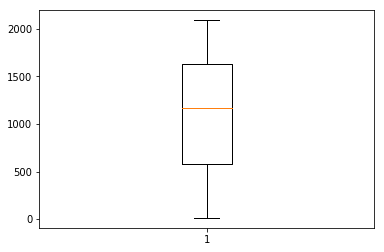

In [14]:
plt.boxplot(df_copy_1['list_price'])
plt.show()

# 3. duplicate data

In [15]:
df_copy_1.nunique()

transaction_id             19803
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   100
standard_cost                103
product_first_sold_date      100
dtype: int64

In [16]:
#show all row is duplicated
df_copy_1[df_copy_1.duplicated()]


Empty DataFrame
Columns: [transaction_id, product_id, customer_id, transaction_date, online_order, order_status, brand, product_line, product_class, product_size, list_price, standard_cost, product_first_sold_date]
Index: []

In [18]:
df.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [17]:
# above show no duplicate data. Now we will export file to see output

df_copy_1.to_excel('ouput_ver1.xlsx')
